In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('it-st-articles-with-year.json')
df

,title,annotation,authors,link,article_text,year
0,НА ПОВЕСТКЕ ДНЯ – ПОСТРОЕНИЕ НООСФЕРЫ,Аннотация:Показа ны потенциал новых информацио...,Назаренко А.П.; Сарьян В.К.; Мещеряков В.Р.,https://itstd-journal.ru/?page_id=1080&article...,НА ПОВЕСТКЕ ДНЯ – ПОСТРОЕНИЕ НООСФЕРЫ\n1Назаре...,2017
1,ОПЫТ ИНТЕГРАЦИИ РАСПРЕДЕЛЕННЫХ ИНФОРМАЦИОННЫХ ...,Аннотация:Рассматривается опыт разработок архи...,Денисов В.Ф.; Куделькин В.А.,https://itstd-journal.ru/?page_id=1080&article...,ОПЫТ ИНТЕГРАЦИИ\nРАСПРЕДЕЛЕННЫХ ИНФОРМАЦИОННЫХ...,2017
2,ПУТИ РЕШЕНИЯ НЕКОТОРЫХ ПРОБЛЕМ КОМПЛЕКСНОЙ БЕЗ...,Аннотация:Сформулированы приоритетные проблемы...,Костогрызов А.И.,https://itstd-journal.ru/?page_id=1080&article...,ПУТИ РЕШЕНИЯ НЕКОТОРЫХ ПРОБЛЕМ КОМПЛЕКСНОЙ\nБЕ...,2017
3,ПРОГНОЗИРОВАНИЕ ВРЕМЕНИ ДО НАРУШЕНИЯ ЦЕЛОСТНОС...,Аннотация:Предложен подход к прогнозированию о...,Нистратов А.А.; Нистратов Г.А.,https://itstd-journal.ru/?page_id=1080&article...,ПРОГНОЗИРОВАНИЕ ВРЕМЕНИ ДО НАРУШЕНИЯ ЦЕЛОСТНОС...,2017
4,ОЦЕНКА СООТВЕТСТВИЯ В ОБЛАСТИ ТЕХНОЛОГИЙ ИСКУС...,Аннотация:Технологии искусственного интеллекта...,Гарбук С.В.,https://itstd-journal.ru/?page_id=1080&article...,ОЦЕНКА СООТВЕТСТВИЯ В ОБЛАСТИ ТЕХНОЛОГИЙ\nИСКУ...,2017
...,...,...,...,...,...,...
198,ОБЛАСТИ ПРИМЕНИМОСТИ НЕСЕКВЕНЦИАЛЬНЫХ АЛГОРИТМОВ,Аннотация:Цель работы – исследование области п...,"Козлов А.В., Титов Е.К.",https://itstd-journal.ru/?page_id=1080&article...,"subsidiary computations, information construct...",2021
199,ПРИОРИТЕТНЫЕ НАПРАВЛЕНИЯ РАЗВИТИЯ СИСТЕМНОЙ ИН...,Аннотация:Настоящая работа посвящена формирова...,"Зацаринный А.А., Костогрызов А.И., Нистратов А.А.",https://itstd-journal.ru/?page_id=1080&article...,1 Введение\nСравнительный анализ различных рос...,2021
200,ТЕОРЕТИЧЕСКОЕ РАЗВИТИЕ МОДЕЛЕЙ ДЛЯ ОЦЕНКИ ЗАЩИ...,Аннотация:Рассмотрены вопросы использования ан...,"Гусев К. В., Леонтьев А.С.",https://itstd-journal.ru/?page_id=1080&article...,"function, approximation, unauthorized access.\...",2021
201,АНАЛИЗ ДАННЫХ О ПОЕЗДКАХ В МЕГАПОЛИСЕ И ПРОГНО...,Аннотация:В данной статье исследуется набор да...,"Дзержинский Р.И., Лапшин И.А., Аносов Т.Э.",https://itstd-journal.ru/?page_id=1080&article...,УДК 519.24\nАНАЛИЗ ДАННЫХ О ПОЕЗДКАХ В МЕГАПОЛ...,2021


In [7]:
nan_count = df['year'].isna().sum().sum()
print('year: ', nan_count)
nan_count = df['title'].isna().sum().sum()
print('title: ', nan_count)
nan_count = df['link'].isna().sum().sum()
print('link: ', nan_count)
nan_count = df['annotation'].isna().sum().sum()
print('annotation: ', nan_count)
nan_count = df['authors'].isna().sum().sum()
print('authors: ', nan_count)
nan_count = df['article_text'].isna().sum().sum()
print('article_text: ', nan_count)

year:  0
title:  0
link:  0
annotation:  0
authors:  0
article_text:  1


In [9]:
#удаление строки с пустым текстом
df = df.dropna(subset='article_text')

In [12]:
nan_count = df['article_text'].isna().sum().sum()
print('article_text: ', nan_count)

article_text:  0


In [24]:
df.to_json('it-st-articles-with-year.json', orient='records') 

In [13]:
#собираем количество слов
count_words = []
for el in df['article_text']:
    count_words.append(len(el.split()))

In [14]:
#ну и сразу добавим и эту информацию в датафрейм
df['count_words'] = count_words

C:\Users\Алехандро\AppData\Local\Temp\ipykernel_2396\3150149876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_words'] = count_words


In [16]:
min_ = min(df['count_words'])
max_ = max(df['count_words'])
range_ = max_ - min_
disp = int(df['count_words'].var())
mean = df['count_words'].mean()
median = df['count_words'].median()
mode = int(df['count_words'].mode()[0])
print('count_words','\n', 'мин:', min_,'\n', 'макс:', max_, '\n', 'размах:', range_, '\n', 'дисперсия:', disp, 
      '\n', 'среднее:', mean,'\n', 'медиана:',median,'\n', 'мода:', mode)

count_words 
 мин: 601 
 макс: 10826 
 размах: 10225 
 дисперсия: 2226508 
 среднее: 2334.5445544554455 
 медиана: 1883.5 
 мода: 1203


0. Ищем выбросы

Единственное место где могут быть выбросы это в количестве слов в статье. Вот их и посмотрим.

In [17]:
iqr = df['count_words'].quantile(0.75) - df['count_words'].quantile(0.25)
lower_bound = df['count_words'].quantile(0.25) - 1.5*iqr
upper_bound = df['count_words'].quantile(0.75) + 1.5*iqr
outliers = list(filter(lambda x: x < lower_bound or x > upper_bound , df['count_words']))
print(outliers)

[7238, 8678, 10826, 6761, 6120, 5836, 7017, 7792, 5100, 5327, 7085, 5398]


Выбросы есть, но все длины статей теоретически возможны.

1. В какие годы чаще всего писали статьи в этой выборке?

In [ ]:
df

In [19]:
sorted(df['year'].unique())

[2014, 2015, 2016, 2017, 2021, 2022, 2023, 2024, 2025]

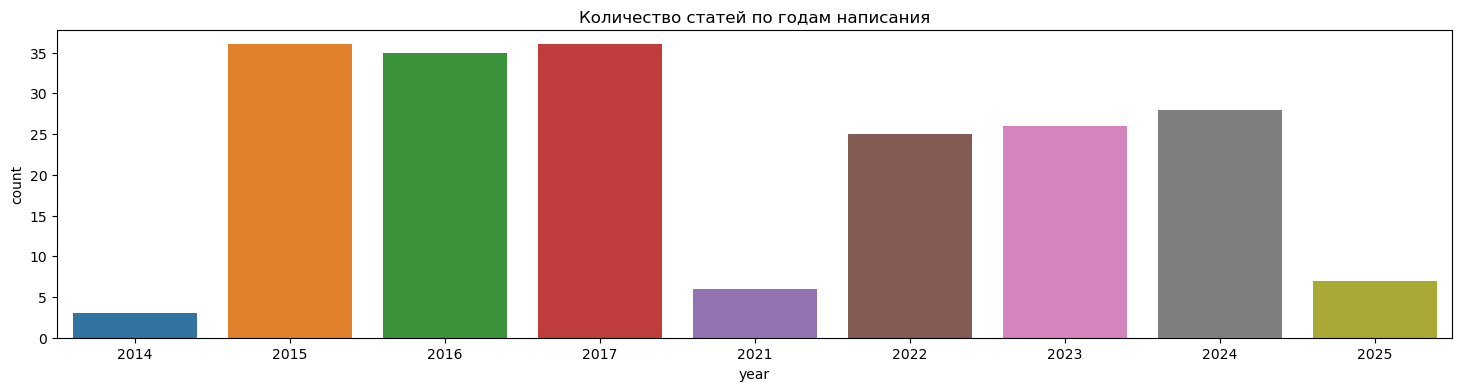

In [22]:
plt.figure(figsize=[18,4])
sns.countplot(data=df, x='year', order=[2014, 2015, 2016, 2017, 2021, 2022, 2023, 2024, 2025] )
plt.title('Количество статей по годам написания')
plt.show()

В 2014 и в 2021 мало статей.

В 2025 тоже, но дата анализа данных 04.04.2025, поэтому предполагаю что к концу года статей станет много.

2. Какая взаимосвязь между длиной статьи и годом написания?

[Text(0, 0, '3031'),
 Text(0, 0, '2820'),
 Text(0, 0, '2419'),
 Text(0, 0, '2352'),
 Text(0, 0, '1799.5'),
 Text(0, 0, '1726'),
 Text(0, 0, '1659.5'),
 Text(0, 0, '1580'),
 Text(0, 0, '1424')]

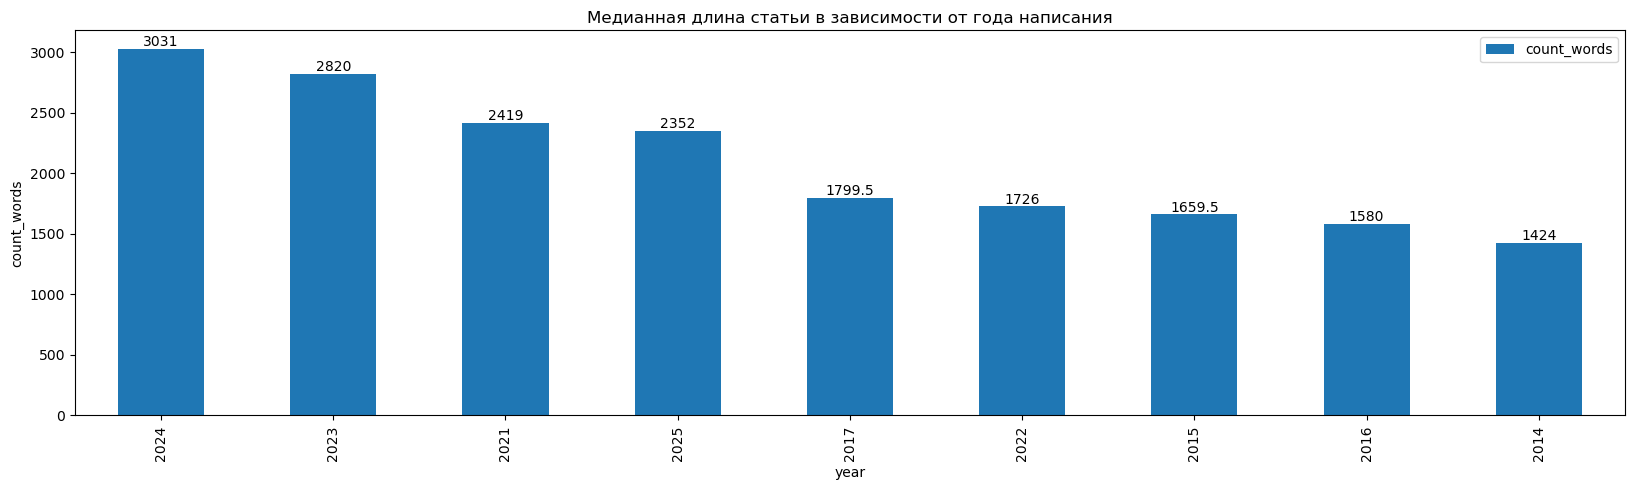

In [23]:
top_salary = df[['count_words', 'year']].groupby('year').median().sort_values('count_words', ascending=False)
ax = top_salary.plot(kind='bar', title='Медианная длина статьи в зависимости от года написания',
                             xlabel='year',
                             ylabel='count_words',
                             figsize=[20,5])
ax.bar_label(ax.containers[0])

Самые длинные статьи писали в 2024 и 2023 годах. Можно предположить, что со временем длина статей в журнале увеличивается.